# Data Analytics I

<h2 style="color:red"> -32566 Mahesh Shriram </h2>

### Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples and
14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
boston = pd.read_csv("boston-housing//train.csv")
boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [19]:
boston.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [20]:
boston.shape

(333, 15)

In [21]:
x_train = pd.DataFrame(np.c_[boston['lstat'],boston['rm']],columns = ['lstat','rm'])
y_train = boston['medv']

Text(0, 0.5, 'medv')

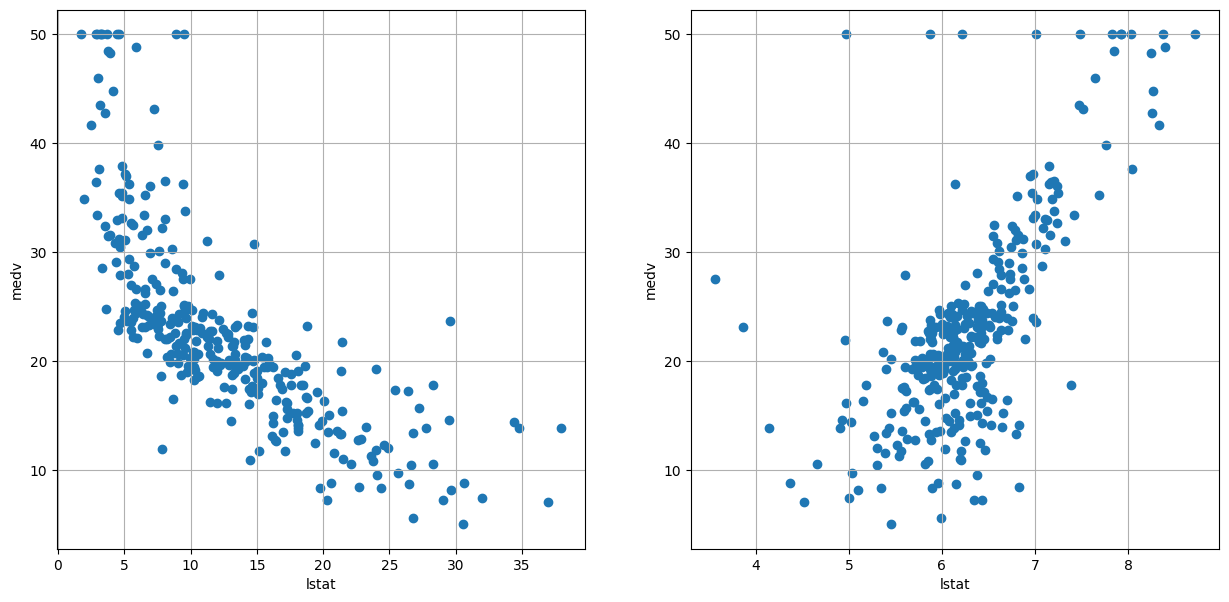

In [22]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(x_train['lstat'],y_train,marker = 'o')
plt.grid(True)
plt.xlabel("lstat")
plt.ylabel("medv")

plt.subplot(1,2,2)
plt.scatter(x_train['rm'],y_train,marker = 'o')
plt.grid(True)
plt.xlabel("lstat")
plt.ylabel("medv")

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [24]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [25]:
y_train_predict = lin_model.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2  = r2_score(y_train, y_train_predict)

In [26]:
print("For Training Data: ")
print(f"rmse: {rmse}")
print(f"r2_score: {r2}")

For Training Data: 
rmse: 5.538890587700497
r2_score: 0.6343339677660715


In [27]:
test = pd.read_csv("boston-housing//test.csv")
x_test = pd.DataFrame()
x_test['lstat'] = test['lstat']
x_test['rm'] = test['rm']
# y_test = test['midv']
x_test

,lstat,rm
0,4.03,7.185
1,5.21,6.430
2,19.15,6.172
3,29.93,5.631
4,17.10,6.004
...,...,...
168,17.60,5.670
169,21.14,5.390
170,12.92,6.019
171,14.33,6.027


In [28]:
x_test.head()

,lstat,rm
0,4.03,7.185
1,5.21,6.430
2,19.15,6.172
3,29.93,5.631
4,17.10,6.004


In [29]:
y_test_predict = lin_model.predict(x_test)

In [30]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Predictions')

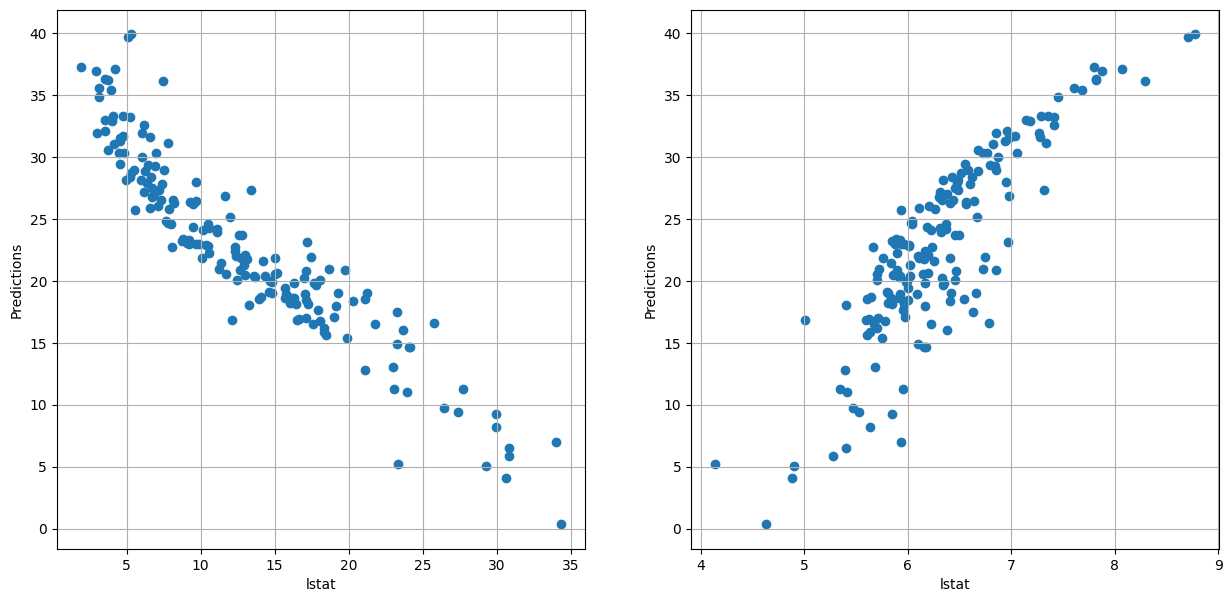

In [31]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(x_test['lstat'],y_test_predict,marker = 'o')
plt.grid(True)
plt.xlabel("lstat")
plt.ylabel("Predictions")

plt.subplot(1,2,2)
plt.scatter(x_test['rm'],y_test_predict,marker = 'o')
plt.grid(True)
plt.xlabel("lstat")
plt.ylabel("Predictions")

<Axes: xlabel='lstat'>

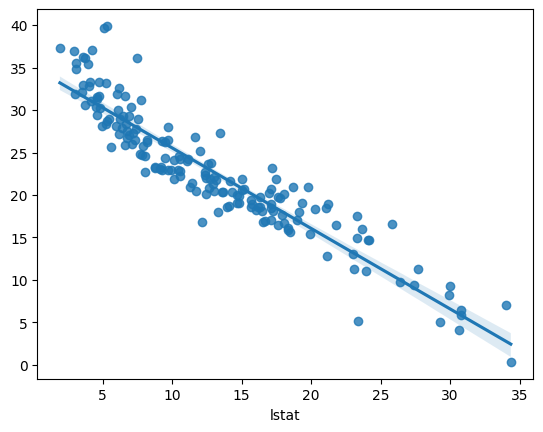

In [33]:
sns.regplot(x =x_test['lstat'], y = y_test_predict)

<Axes: xlabel='lstat', ylabel='medv'>

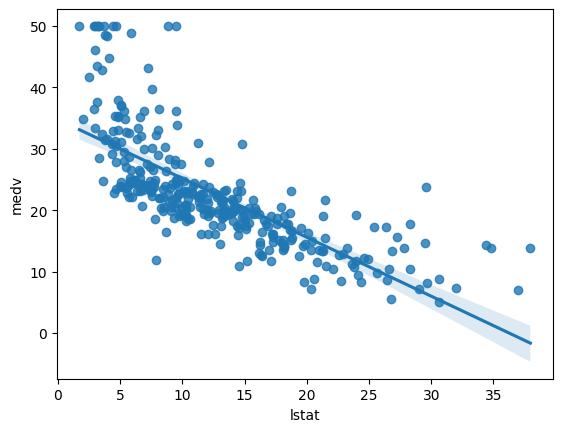

In [34]:
sns.regplot(x =x_train['lstat'], y = y_train)